In [22]:
import face_recognition

# Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.
# You can do that by using the face_distance function.

# The model was trained in a way that faces with a distance of 0.6 or less should be a match. But if you want to
# be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false
# positive matches at the risk of more false negatives.

# Note: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a
# smaller distance are more similar to each other than ones with a larger distance.

# Load some images to compare against
known_obama_image = face_recognition.load_image_file("obama.jpg")
known_biden_image = face_recognition.load_image_file("biden.jpg")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("obama2.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

0.31828789695867044
0
The test image has a distance of 0.32 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

0.84434292955727
1
The test image has a distance of 0.84 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False



Learned encoding for 4 images.
0.09123461559215457
10
0.33819645037340795
34


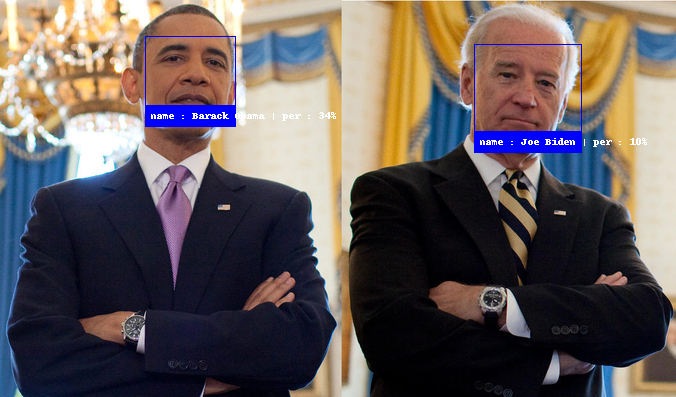

In [60]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
import math
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

test01_image = face_recognition.load_image_file("test01.jpg")
test01_face_encoding = face_recognition.face_encodings(test01_image)[0]

# Load a sample picture and learn how to recognize it.
test02_image = face_recognition.load_image_file("test02.jpg")
test02_face_encoding = face_recognition.face_encodings(test02_image)[0]


# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding,
    test01_face_encoding,
    test02_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden",
    "person1",
    "person2"
]
print('Learned encoding for', len(known_face_encodings), 'images.')
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("two_people.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance=0.5)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    #해당 이름 변경 하는 코드
    if matches[best_match_index]:
        print(face_distances[best_match_index])
        print(math.ceil(face_distances[best_match_index]*100))
        name = "name : " + known_face_names[best_match_index] +" | per : " +str(math.ceil(face_distances[best_match_index]*100)) +"%"
    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

In [22]:
import face_recognition
import cv2

# This is a demo of running face recognition on a video file and saving the results to a new video file.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open the input movie file
input_movie = cv2.VideoCapture("hamilton_clip.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

# Create an output movie file (make sure resolution/frame rate matches input video!)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('output.avi', fourcc, 29.97, (640, 360))

# Load some sample pictures and learn how to recognize them.
lmm_image = face_recognition.load_image_file("lin-manuel-miranda.png")
lmm_face_encoding = face_recognition.face_encodings(lmm_image)[0]

al_image = face_recognition.load_image_file("alex-lacamoire.png")
al_face_encoding = face_recognition.face_encodings(al_image)[0]

known_faces = [
    lmm_face_encoding,
    al_face_encoding
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

        # If you had more than 2 faces, you could make this logic a lot prettier
        # but I kept it simple for the demo
        name = None
        if match[0]:
            name = "Lin-Manuel Miranda"
        elif match[1]:
            name = "Alex Lacamoire"

        face_names.append(name)

    # Label the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

# All done!
input_movie.release()
cv2.destroyAllWindows()

Writing frame 1 / 2356
Writing frame 2 / 2356
Writing frame 3 / 2356
Writing frame 4 / 2356
Writing frame 5 / 2356
Writing frame 6 / 2356
Writing frame 7 / 2356
Writing frame 8 / 2356
Writing frame 9 / 2356
Writing frame 10 / 2356
Writing frame 11 / 2356
Writing frame 12 / 2356
Writing frame 13 / 2356
Writing frame 14 / 2356
Writing frame 15 / 2356
Writing frame 16 / 2356
Writing frame 17 / 2356
Writing frame 18 / 2356
Writing frame 19 / 2356
Writing frame 20 / 2356
Writing frame 21 / 2356
Writing frame 22 / 2356
Writing frame 23 / 2356
Writing frame 24 / 2356
Writing frame 25 / 2356
Writing frame 26 / 2356
Writing frame 27 / 2356
Writing frame 28 / 2356
Writing frame 29 / 2356
Writing frame 30 / 2356
Writing frame 31 / 2356
Writing frame 32 / 2356
Writing frame 33 / 2356
Writing frame 34 / 2356
Writing frame 35 / 2356
Writing frame 36 / 2356
Writing frame 37 / 2356
Writing frame 38 / 2356
Writing frame 39 / 2356
Writing frame 40 / 2356
Writing frame 41 / 2356
Writing frame 42 / 2356
W

Writing frame 334 / 2356
Writing frame 335 / 2356
Writing frame 336 / 2356
Writing frame 337 / 2356
Writing frame 338 / 2356
Writing frame 339 / 2356
Writing frame 340 / 2356
Writing frame 341 / 2356
Writing frame 342 / 2356
Writing frame 343 / 2356
Writing frame 344 / 2356
Writing frame 345 / 2356
Writing frame 346 / 2356
Writing frame 347 / 2356
Writing frame 348 / 2356
Writing frame 349 / 2356
Writing frame 350 / 2356
Writing frame 351 / 2356
Writing frame 352 / 2356
Writing frame 353 / 2356
Writing frame 354 / 2356
Writing frame 355 / 2356
Writing frame 356 / 2356
Writing frame 357 / 2356
Writing frame 358 / 2356
Writing frame 359 / 2356
Writing frame 360 / 2356
Writing frame 361 / 2356
Writing frame 362 / 2356
Writing frame 363 / 2356
Writing frame 364 / 2356
Writing frame 365 / 2356
Writing frame 366 / 2356
Writing frame 367 / 2356
Writing frame 368 / 2356
Writing frame 369 / 2356
Writing frame 370 / 2356
Writing frame 371 / 2356
Writing frame 372 / 2356
Writing frame 373 / 2356


Writing frame 662 / 2356
Writing frame 663 / 2356
Writing frame 664 / 2356
Writing frame 665 / 2356
Writing frame 666 / 2356
Writing frame 667 / 2356
Writing frame 668 / 2356
Writing frame 669 / 2356
Writing frame 670 / 2356
Writing frame 671 / 2356
Writing frame 672 / 2356
Writing frame 673 / 2356
Writing frame 674 / 2356
Writing frame 675 / 2356
Writing frame 676 / 2356
Writing frame 677 / 2356
Writing frame 678 / 2356
Writing frame 679 / 2356
Writing frame 680 / 2356
Writing frame 681 / 2356
Writing frame 682 / 2356
Writing frame 683 / 2356
Writing frame 684 / 2356
Writing frame 685 / 2356
Writing frame 686 / 2356
Writing frame 687 / 2356
Writing frame 688 / 2356
Writing frame 689 / 2356
Writing frame 690 / 2356
Writing frame 691 / 2356
Writing frame 692 / 2356
Writing frame 693 / 2356
Writing frame 694 / 2356
Writing frame 695 / 2356
Writing frame 696 / 2356
Writing frame 697 / 2356
Writing frame 698 / 2356
Writing frame 699 / 2356
Writing frame 700 / 2356
Writing frame 701 / 2356


Writing frame 990 / 2356
Writing frame 991 / 2356
Writing frame 992 / 2356
Writing frame 993 / 2356
Writing frame 994 / 2356
Writing frame 995 / 2356
Writing frame 996 / 2356
Writing frame 997 / 2356
Writing frame 998 / 2356
Writing frame 999 / 2356
Writing frame 1000 / 2356
Writing frame 1001 / 2356
Writing frame 1002 / 2356
Writing frame 1003 / 2356
Writing frame 1004 / 2356
Writing frame 1005 / 2356
Writing frame 1006 / 2356
Writing frame 1007 / 2356
Writing frame 1008 / 2356
Writing frame 1009 / 2356
Writing frame 1010 / 2356
Writing frame 1011 / 2356
Writing frame 1012 / 2356
Writing frame 1013 / 2356
Writing frame 1014 / 2356
Writing frame 1015 / 2356
Writing frame 1016 / 2356
Writing frame 1017 / 2356
Writing frame 1018 / 2356
Writing frame 1019 / 2356
Writing frame 1020 / 2356
Writing frame 1021 / 2356
Writing frame 1022 / 2356
Writing frame 1023 / 2356
Writing frame 1024 / 2356
Writing frame 1025 / 2356
Writing frame 1026 / 2356
Writing frame 1027 / 2356
Writing frame 1028 / 2

Writing frame 1306 / 2356
Writing frame 1307 / 2356
Writing frame 1308 / 2356
Writing frame 1309 / 2356
Writing frame 1310 / 2356
Writing frame 1311 / 2356
Writing frame 1312 / 2356
Writing frame 1313 / 2356
Writing frame 1314 / 2356
Writing frame 1315 / 2356
Writing frame 1316 / 2356
Writing frame 1317 / 2356
Writing frame 1318 / 2356
Writing frame 1319 / 2356
Writing frame 1320 / 2356
Writing frame 1321 / 2356
Writing frame 1322 / 2356
Writing frame 1323 / 2356
Writing frame 1324 / 2356
Writing frame 1325 / 2356
Writing frame 1326 / 2356
Writing frame 1327 / 2356
Writing frame 1328 / 2356
Writing frame 1329 / 2356
Writing frame 1330 / 2356
Writing frame 1331 / 2356
Writing frame 1332 / 2356
Writing frame 1333 / 2356
Writing frame 1334 / 2356
Writing frame 1335 / 2356
Writing frame 1336 / 2356
Writing frame 1337 / 2356
Writing frame 1338 / 2356
Writing frame 1339 / 2356
Writing frame 1340 / 2356
Writing frame 1341 / 2356
Writing frame 1342 / 2356
Writing frame 1343 / 2356
Writing fram

Writing frame 1623 / 2356
Writing frame 1624 / 2356
Writing frame 1625 / 2356
Writing frame 1626 / 2356
Writing frame 1627 / 2356
Writing frame 1628 / 2356
Writing frame 1629 / 2356
Writing frame 1630 / 2356
Writing frame 1631 / 2356
Writing frame 1632 / 2356
Writing frame 1633 / 2356
Writing frame 1634 / 2356
Writing frame 1635 / 2356
Writing frame 1636 / 2356
Writing frame 1637 / 2356
Writing frame 1638 / 2356
Writing frame 1639 / 2356
Writing frame 1640 / 2356
Writing frame 1641 / 2356
Writing frame 1642 / 2356
Writing frame 1643 / 2356
Writing frame 1644 / 2356
Writing frame 1645 / 2356
Writing frame 1646 / 2356
Writing frame 1647 / 2356
Writing frame 1648 / 2356
Writing frame 1649 / 2356
Writing frame 1650 / 2356
Writing frame 1651 / 2356
Writing frame 1652 / 2356
Writing frame 1653 / 2356
Writing frame 1654 / 2356
Writing frame 1655 / 2356
Writing frame 1656 / 2356
Writing frame 1657 / 2356
Writing frame 1658 / 2356
Writing frame 1659 / 2356
Writing frame 1660 / 2356
Writing fram

Writing frame 1940 / 2356
Writing frame 1941 / 2356
Writing frame 1942 / 2356
Writing frame 1943 / 2356
Writing frame 1944 / 2356
Writing frame 1945 / 2356
Writing frame 1946 / 2356
Writing frame 1947 / 2356
Writing frame 1948 / 2356
Writing frame 1949 / 2356
Writing frame 1950 / 2356
Writing frame 1951 / 2356
Writing frame 1952 / 2356
Writing frame 1953 / 2356
Writing frame 1954 / 2356
Writing frame 1955 / 2356
Writing frame 1956 / 2356
Writing frame 1957 / 2356
Writing frame 1958 / 2356
Writing frame 1959 / 2356
Writing frame 1960 / 2356
Writing frame 1961 / 2356
Writing frame 1962 / 2356
Writing frame 1963 / 2356
Writing frame 1964 / 2356
Writing frame 1965 / 2356
Writing frame 1966 / 2356
Writing frame 1967 / 2356
Writing frame 1968 / 2356
Writing frame 1969 / 2356
Writing frame 1970 / 2356
Writing frame 1971 / 2356
Writing frame 1972 / 2356
Writing frame 1973 / 2356
Writing frame 1974 / 2356
Writing frame 1975 / 2356
Writing frame 1976 / 2356
Writing frame 1977 / 2356
Writing fram

Writing frame 2257 / 2356
Writing frame 2258 / 2356
Writing frame 2259 / 2356
Writing frame 2260 / 2356
Writing frame 2261 / 2356
Writing frame 2262 / 2356
Writing frame 2263 / 2356
Writing frame 2264 / 2356
Writing frame 2265 / 2356
Writing frame 2266 / 2356
Writing frame 2267 / 2356
Writing frame 2268 / 2356
Writing frame 2269 / 2356
Writing frame 2270 / 2356
Writing frame 2271 / 2356
Writing frame 2272 / 2356
Writing frame 2273 / 2356
Writing frame 2274 / 2356
Writing frame 2275 / 2356
Writing frame 2276 / 2356
Writing frame 2277 / 2356
Writing frame 2278 / 2356
Writing frame 2279 / 2356
Writing frame 2280 / 2356
Writing frame 2281 / 2356
Writing frame 2282 / 2356
Writing frame 2283 / 2356
Writing frame 2284 / 2356
Writing frame 2285 / 2356
Writing frame 2286 / 2356
Writing frame 2287 / 2356
Writing frame 2288 / 2356
Writing frame 2289 / 2356
Writing frame 2290 / 2356
Writing frame 2291 / 2356
Writing frame 2292 / 2356
Writing frame 2293 / 2356
Writing frame 2294 / 2356
Writing fram